In [6]:
import os
import json
import h5py
import numpy as np

import robomimic
import robomimic.utils.file_utils as FileUtils

# the dataset registry can be found at robomimic/__init__.py
from robomimic import DATASET_REGISTRY
import os
# print(os.environ['LD_LIBRARY_PATH'])
# print(list(os.environ))
os.environ['LD_LIBRARY_PATH'] = '/usr/local/cuda-12.1/lib64:/home/omniverse/.mujoco/mujoco210/bin:/usr/lib/nvidia:/home/omniverse/workspace/PyRep/CoppeliaSim_Edu_V4_1_0_Ubuntu20_04'


task = "lift"
dataset_type = "mg"
hdf5_type = "low_dim_sparse"

dataset_type = "ph"
hdf5_type = "low_dim"


dataset_path = os.path.join("../..", "datasets", task, dataset_type, f"{hdf5_type}_v141.hdf5")
# dataset_path = os.path.join("../..", "datasets", task, dataset_type, f"{hdf5_type}_v141_augmented.hdf5")
# dataset_path = os.path.join("../..", "datasets", task, dataset_type, f"{hdf5_type}_v141_augmented_goal.hdf5")
assert os.path.exists(dataset_path)

# open file
# f = h5py.File(dataset_path, "r")
# # print("hdf5 file {} has the following keys:".format(list(f.keys())))
# print(np.asarray(f["object"]).shape)

(10,)


In [3]:
# open file
f = h5py.File(dataset_path, "r")

print("hdf5 file {} has the following keys:".format(list(f.keys())))
print("data file {} has the following keys:".format(list(f["data"].keys())))
print("goal obs file {} has the following keys:".format(list(f["goal_obs"].keys())))
print("demo 0 {} has the following keys:".format(list(f["data"]["demo_1"].keys())))
print("Obs {} has the following keys:".format(list(f["data"]["demo_1"]["obs"].keys())))
print("states {} has the following keys:".format(list(f["data"]["demo_1"]["states"].shape)))

# each demonstration is a group under "data"
demos = list(f["data"].keys())
num_demos = len(demos)

print("hdf5 file {} has {} demonstrations".format(dataset_path, num_demos))

hdf5 file ['data', 'goal_obs', 'mask'] has the following keys:
data file ['demo_0', 'demo_1', 'demo_10', 'demo_100', 'demo_101', 'demo_102', 'demo_103', 'demo_104', 'demo_105', 'demo_106', 'demo_107', 'demo_108', 'demo_109', 'demo_11', 'demo_110', 'demo_111', 'demo_112', 'demo_113', 'demo_114', 'demo_115', 'demo_116', 'demo_117', 'demo_118', 'demo_119', 'demo_12', 'demo_120', 'demo_121', 'demo_122', 'demo_123', 'demo_124', 'demo_125', 'demo_126', 'demo_127', 'demo_128', 'demo_129', 'demo_13', 'demo_130', 'demo_131', 'demo_132', 'demo_133', 'demo_134', 'demo_135', 'demo_136', 'demo_137', 'demo_138', 'demo_139', 'demo_14', 'demo_140', 'demo_141', 'demo_142', 'demo_143', 'demo_144', 'demo_145', 'demo_146', 'demo_147', 'demo_148', 'demo_149', 'demo_15', 'demo_150', 'demo_151', 'demo_152', 'demo_153', 'demo_154', 'demo_155', 'demo_156', 'demo_157', 'demo_158', 'demo_159', 'demo_16', 'demo_160', 'demo_161', 'demo_162', 'demo_163', 'demo_164', 'demo_165', 'demo_166', 'demo_167', 'demo_168', '

In [3]:
# each demonstration is named "demo_#" where # is a number.
# Let's put the demonstration list in increasing episode order
inds = np.argsort([int(elem[5:]) for elem in demos])
demos = [demos[i] for i in inds]

for ep in demos:
    num_actions = f["data/{}/actions".format(ep)].shape[0]
    print("{} has {} samples".format(ep, num_actions))

demo_0 has 59 samples
demo_1 has 58 samples
demo_2 has 57 samples
demo_3 has 55 samples
demo_4 has 51 samples
demo_5 has 58 samples
demo_6 has 49 samples
demo_7 has 49 samples
demo_8 has 44 samples
demo_9 has 51 samples
demo_10 has 54 samples
demo_11 has 49 samples
demo_12 has 53 samples
demo_13 has 59 samples
demo_14 has 51 samples
demo_15 has 50 samples
demo_16 has 50 samples
demo_17 has 45 samples
demo_18 has 49 samples
demo_19 has 51 samples
demo_20 has 48 samples
demo_21 has 57 samples
demo_22 has 47 samples
demo_23 has 47 samples
demo_24 has 52 samples
demo_25 has 48 samples
demo_26 has 43 samples
demo_27 has 46 samples
demo_28 has 49 samples
demo_29 has 41 samples
demo_30 has 46 samples
demo_31 has 42 samples
demo_32 has 59 samples
demo_33 has 54 samples
demo_34 has 48 samples
demo_35 has 58 samples
demo_36 has 45 samples
demo_37 has 50 samples
demo_38 has 49 samples
demo_39 has 41 samples
demo_40 has 40 samples
demo_41 has 49 samples
demo_42 has 53 samples
demo_43 has 39 sample

In [40]:
# look at first demonstration
demo_key = demos[0]
demo_grp = f["data/{}".format(demo_key)]

# Each observation is a dictionary that maps modalities to numpy arrays, and
# each action is a numpy array. Let's print the observations and actions for the 
# first 5 timesteps of this trajectory.
for t in range(5):
    print("timestep {}".format(t))
    obs_t = dict()
    # each observation modality is stored as a subgroup
    for k in demo_grp["obs"]:
        obs_t[k] = demo_grp["obs/{}".format(k)][t] # numpy array
    act_t = demo_grp["actions"][t]
    
    # pretty-print observation and action using json
    obs_t_pp = { k : obs_t[k].tolist() for k in obs_t }
    print("obs")
    print(json.dumps(obs_t_pp, indent=4))
    print("action")
    print(act_t)

timestep 0
obs
{
    "object": [
        0.029494602221712428,
        -0.017737698954969572,
        0.8304269018280013,
        0.0,
        0.0,
        0.9090948178637708,
        -0.41658926070319835,
        -0.13022981673979164,
        -0.0029859840307950025,
        0.1895658895923753
    ],
    "robot0_eef_pos": [
        -0.10073521451807921,
        -0.020723682985764574,
        1.0199927914203766
    ],
    "robot0_eef_quat": [
        0.9966929068047311,
        -0.025697052026186502,
        0.07708638263985222,
        0.0007750185815053256
    ],
    "robot0_eef_vel_ang": [
        0.0,
        0.0,
        0.0
    ],
    "robot0_eef_vel_lin": [
        0.0,
        0.0,
        0.0
    ],
    "robot0_gripper_qpos": [
        0.020833,
        -0.020833
    ],
    "robot0_gripper_qvel": [
        0.0,
        0.0
    ],
    "robot0_joint_pos": [
        -0.017909877207578785,
        0.1731520505084669,
        -0.022929305583027196,
        -2.628534517265664,
      

# Visualizing demonstration trajectories

In [15]:
import robomimic.utils.env_utils as EnvUtils

env_meta = json.loads(f["data"].attrs["env_args"])
# create simulation environment from environment metedata
env = EnvUtils.create_env_from_metadata(
    env_meta=env_meta, 
    render=False,            # no on-screen rendering
    render_offscreen=True,   # off-screen rendering to support rendering video frames
)

Import error. Trying to rebuild mujoco_py.


INFO:root:Device 0 is available for rendering
INFO:root:Device 1 is available for rendering
INFO:root:Command '['/home/omniverse/miniforge3/envs/robomimic/lib/python3.8/site-packages/egl_probe/build/test_device', '3']' returned non-zero exit status 1.
INFO:root:Device 3 is not available for rendering
INFO:root:Command '['/home/omniverse/miniforge3/envs/robomimic/lib/python3.8/site-packages/egl_probe/build/test_device', '4']' returned non-zero exit status 1.
INFO:root:Device 4 is not available for rendering


Created environment with name Lift
Action size is 7


In [36]:
import robomimic.utils.obs_utils as ObsUtils
import imageio


# We normally need to make sure robomimic knows which observations are images (for the
# data processing pipeline). This is usually inferred from your training config, but
# since we are just playing back demonstrations, we just need to initialize robomimic
# with a dummy spec.
dummy_spec = dict(
    obs=dict(
            low_dim=["robot0_eef_pos"],
            rgb=[],
        ),
)
ObsUtils.initialize_obs_utils_with_obs_specs(obs_modality_specs=dummy_spec)

download_folder = "."

# prepare to write playback trajectories to video
video_path = os.path.join(download_folder, "playback.mp4")
video_writer = imageio.get_writer(video_path, fps=20)

def playback_trajectory(demo_key):
    """
    Simple helper function to playback the trajectory stored under the hdf5 group @demo_key and
    write frames rendered from the simulation to the active @video_writer.
    """
    
    # robosuite datasets store the ground-truth simulator states under the "states" key.
    # We will use the first one, alone with the model xml, to reset the environment to
    # the initial configuration before playing back actions.
    init_state = f["data/{}/states".format(demo_key)][0]
    model_xml = f["data/{}".format(demo_key)].attrs["model_file"]
    initial_state_dict = dict(states=init_state, model=model_xml)
    
    # reset to initial state
    env.reset_to(initial_state_dict)
    
    # playback actions one by one, and render frames
    actions = f["data/{}/actions".format(demo_key)][:]
    for t in range(actions.shape[0]):
        env.step(actions[t])
        video_img = env.render(mode="rgb_array", height=512, width=512, camera_name="agentview")
        video_writer.append_data(video_img)


============= Initialized Observation Utils with Obs Spec =============

using obs modality: low_dim with keys: ['robot0_eef_pos']
using obs modality: rgb with keys: []


In [37]:
# playback the first 5 demos
# for ep in [demos[0], demos[500], demos[1000], demos[1499]]:
# successful trajs
for ep in [demos[909], demos[1056], demos[1216], demos[1499]]:
    print("Playing back demo key: {}".format(ep))
    playback_trajectory(ep)

# done writing video
video_writer.close()

Playing back demo key: demo_910
Playing back demo key: demo_1057
Playing back demo key: demo_1217
Playing back demo key: demo_1500


In [38]:
from IPython.display import Video
Video(video_path, embed=True)

# Visualize reward

demo demo_0: final reward: 1.0
demo demo_1: final reward: 1.0
demo demo_2: final reward: 1.0
demo demo_3: final reward: 1.0
demo demo_4: final reward: 1.0
demo demo_5: final reward: 1.0
demo demo_6: final reward: 1.0
demo demo_7: final reward: 1.0
demo demo_8: final reward: 1.0
demo demo_9: final reward: 1.0
demo demo_10: final reward: 1.0
demo demo_11: final reward: 1.0
demo demo_12: final reward: 1.0
demo demo_13: final reward: 1.0
demo demo_14: final reward: 1.0
demo demo_15: final reward: 1.0
demo demo_16: final reward: 1.0
demo demo_17: final reward: 1.0
demo demo_18: final reward: 1.0
demo demo_19: final reward: 1.0
demo demo_20: final reward: 1.0
demo demo_21: final reward: 1.0
demo demo_22: final reward: 1.0
demo demo_23: final reward: 1.0
demo demo_24: final reward: 1.0
demo demo_25: final reward: 1.0
demo demo_26: final reward: 1.0
demo demo_27: final reward: 1.0
demo demo_28: final reward: 1.0
demo demo_29: final reward: 1.0
demo demo_30: final reward: 1.0
demo demo_31: fina

Text(0, 0.5, 'Final Reward')

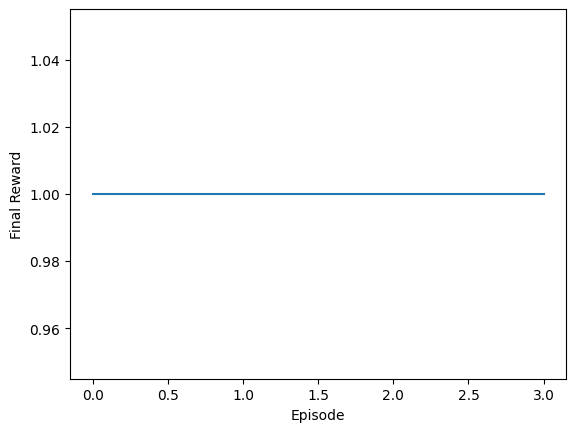

In [5]:
# plot all the final rewards of the trajectories
final_rewards = []
for ep in demos:
    final_reward = f["data/{}/rewards".format(ep)][-1]
    if final_reward>0:
        print("demo {}: final reward: {}".format(ep, final_reward))
    # print("demo {}: final reward: {}".format(ep, final_reward))
    final_rewards.append(final_reward)
    
import matplotlib.pyplot as plt

plt.figure()
plt.plot(final_rewards[::50])
plt.xlabel("Episode")
plt.ylabel("Final Reward")

## Visualize dones

In [29]:
# plot all the final rewards of the trajectories
dones = []
obj_z_poses = []
for ep in demos:
    done = np.asarray(f["data/{}/dones".format(ep)])
    dones.append(done)
    
    z_pos = np.asarray(f["data/{}/obs/object".format(ep)])[:, 2]
    obj_z_poses.append(z_pos)
    # print(z_pos.shape)
    
    
print(dones[2])
print(obj_z_poses[2])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[0.83177804 0.81967696 0.81919029 0.82044692 0.82104051 0.82130983
 0.82143807 0.82150076 0.82153176 0.82154717 0.82155484 0.82155867
 0.82156058 0.82156154 0.82156201 0.82156225 0.82156237 0.82156243
 0.82156246 0.82156247 0.82156248 0.82156249 0.82156249 0.82156249
 0.82156249 0.82156249 0.82156249 0.82156249 0.82156249 0.82156249
 0.82156249 0.82156249 0.82156249 0.82156249 0.82156249 0.82156249
 0.82156249 0.82156249 0.82156249 0.82156249 0.82156249 0.82156249
 0.82156249 0.82156249 0.82156249 0.82156249 0.82156249 0.82156249
 0.82156249 0.82156249 0.82156249 0.82156249 0.82156249 0.82156249
 0.82156249 0.82156249 0.82156249 0.82156249 0.82156249 0.82156249
 0.82156249 0.82156249 0

In [30]:
print(dones[-3])
print(obj_z_poses[-3])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[0.83102359 0.81892253 0.81843588 0.81969252 0.8202861  0.82055542
 0.82068367 0.82074636 0.82077736 0.82079277 0.82080044 0.82080427
 0.82080618 0.82184711 0.82024936 0.82043515 0.82063067 0.82186787
 0.82265714 0.82037462 0.82173733 0.82223847 0.81904518 0.82259673
 0.81778826 0.81735752 0.81651857 0.81685455 0.81669408 0.81689341
 0.81754751 0.81870239 0.81839321 0.81872223 0.81901091 0.82061778
 0.81808425 0.81792172 0.81851456 0.81959481 0.82109805 0.82299915
 0.82461829 0.82595956 0.82579135 0.82495982 0.82451997 0.82483451
 0.82618689 0.82704501 0.8273273  0.82695004 0.82594488 0.82638952
 0.82634207 0.82495842 0.82813045 0.82330605 0.82660275 0.82916151
 0.832378   0.83674554 0

## Explore distibution of the starting positions of the object and the gripper

(1500, 3)
(1500, 3)


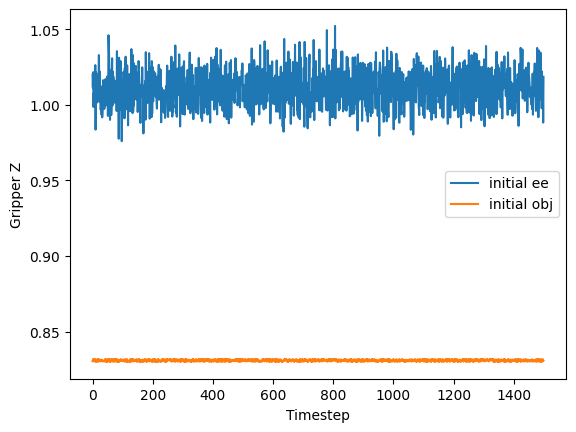

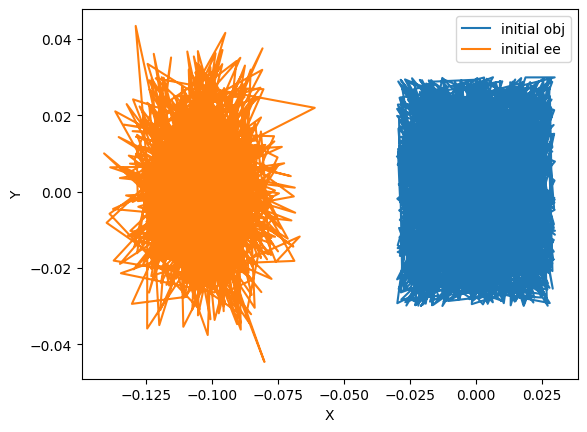

In [36]:
init_obj = []
init_ee = []

for ep in demos:
    # obj_poses = np.asarray(f["data/{}/obs/object".format(ep)])
    # print(obj_poses.shape)
    # ee_poses = np.asarray(f["data/{}/obs/robot0_eef_pos".format(ep)])
    # print(ee_poses.shape)
    init_obj.append(np.asarray(f["data/{}/obs/object".format(ep)])[0][:3])
    init_ee.append(np.asarray(f["data/{}/obs/robot0_eef_pos".format(ep)])[0][:3])
    
init_obj = np.asarray(init_obj)
init_ee = np.asarray(init_ee)
print(init_obj.shape)
print(init_ee.shape)
    
# plot only the z of the gripper and the object
plt.figure()
plt.plot(init_ee[:, 2], label="initial ee")
plt.plot(init_obj[:, 2], label="initial obj")
plt.legend()
plt.xlabel("Timestep")
plt.ylabel("Gripper Z")
plt.show()

# # plot xy of the object and the gripper
plt.figure()
plt.plot(init_obj[:, 0], init_obj[:, 1], label="initial obj")
plt.plot(init_ee[:, 0], init_ee[:, 1], label="initial ee")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()